<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are working on developing an email spam detection system for an email service provider.
Goal is to build a machine learning model that can classify incoming emails as either spam
or not spam based on their content. You have collected a labeled dataset of emails, where each
email is marked as &#39;Spam&#39; or &#39;Not Spam.&#39; Implement a Naive Bayes-based
classification model with Laplace smoothing for this task.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [16]:
spam_data = pd.read_csv('/content/spam_or_not_spam.csv')
spam_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [17]:
spam_data.isnull()

,email,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [24]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


Bar chart or pie chart that illustrates the distribution of the
email dataset, showing the proportion of emails that are labeled as &#39;Spam&#39; and &#39;Not Spam.&#39; This
will give an overview of the class balance in the dataset.

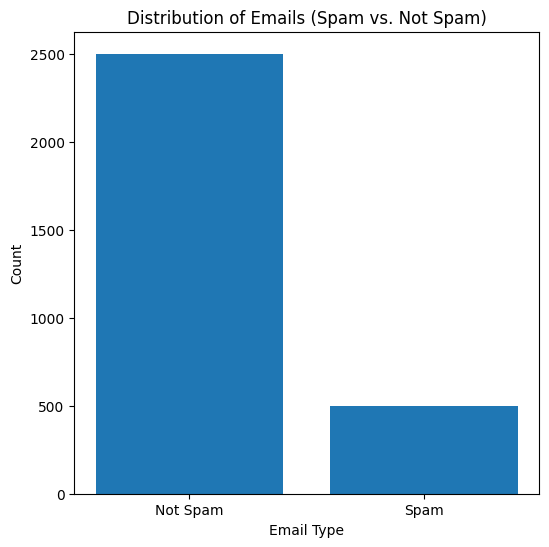

In [56]:
# Counting the number of emails in each class

spam_count = spam_data['label'].sum()
not_spam_count = len(spam_data) - spam_count

plt.figure(figsize=(6, 6))
plt.bar(['Not Spam', 'Spam'], [not_spam_count, spam_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Emails (Spam vs. Not Spam)')

plt.show()

**Findings:** Bar chart clearly shows the class imbalance in the dataset, where "not spam" class has a higher count than the "spam" class.

Checking the missing values

In [35]:
missing_values = spam_data['email'].isnull().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [36]:
spam_data.dropna(subset=['email'],inplace=True) # Removing rows with missing email text

In [37]:
spam_data['email'].fillna('',inplace=True)

Splitting the dataset into training and testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(spam_data['email'], spam_data['label'], test_size=0.2, random_state=42)

In [39]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Remove non-alphabetical characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to your email data
X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

In [44]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

In [52]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

In [54]:
# Create a Multinomial Naive Bayes classifier with Laplace smoothing
nb_classifier = MultinomialNB(alpha=1.0)  # 'alpha' controls the smoothing, typically set to 1.0 (Laplace smoothing)

# Train the classifier on the vectorized training data
nb_classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [58]:
y_pred = nb_classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       500
           1       1.00      0.21      0.35       100

    accuracy                           0.87       600
   macro avg       0.93      0.60      0.64       600
weighted avg       0.89      0.87      0.83       600

